In [ ]:
pip install keras-layer-normalization

# VGG16 Model Architecture

In [ ]:
from keras.applications import vgg16
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

# MobileNet was designed to work on 224 x 224 pixel input images sizes
img_rows, img_cols = 224, 224

# Re-loads the MobileNet model without the top or FC layers
vgg = vgg16.VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_rows, img_cols, 3))

# Here we freeze the last 4 layers
for layer in vgg.layers:
    layer.trainable = False

def lw(bottom_model, num_classes):
    """Creates the top or head of the model that will be
    placed on top of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024, activation='relu')(top_model)
    top_model = Dense(512, activation='relu')(top_model)
    top_model = Dense(num_classes, activation='softmax')(top_model)
    return top_model

# Set the number of classes
num_classes = 4

# Create the fully connected head
FC_Head = lw(vgg, num_classes)

# Combine the base VGG model with the fully connected head
model = Model(inputs=vgg.input, outputs=FC_Head)

# Print the model summary
print(model.summary())


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_8           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1024)                │         525,3

 Total params: 15,766,852 (60.15 MB)

 Trainable params: 1,052,164 (4.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

None


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Image Data Preprocessing : Training and Validation Data Generation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_dir = '/content/drive/MyDrive/FR_Data/train'
validation_data_dir = '/content/drive/MyDrive/FR_Data/valid'

# Let's use some data augmentaiton
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# set our batch size (typically on most mid tier systems we'll use 16-32)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical')

Found 26 images belonging to 4 classes.
Found 25 images belonging to 4 classes.


# Model Training

In [ ]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("face recognition.keras",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True)

# Define the RMSprop optimizer with the desired learning rate
optimizer = RMSprop(learning_rate=0.001)

# Compile the model with the optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


# Enter the number of training and validation samples here
nb_train_samples = 30
nb_validation_samples = 30

# We only train 5 EPOCHS
epochs = 20
batch_size = 10

history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save("face_recognition.h5")

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - accuracy: 0.6538 - loss: 0.8453 - val_accuracy: 0.4800 - val_loss: 1.9246
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.5000 - loss: 1.9943 - val_accuracy: 0.7200 - val_loss: 0.8334
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7692 - loss: 0.7251 - val_accuracy: 0.6400 - val_loss: 0.9617
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5769 - loss: 0.9480 - val_accuracy: 0.4800 - val_loss: 1.2206
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.5769 - loss: 1.0507 - val_accuracy: 0.7200 - val_loss: 0.7200
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7692 - loss: 0.6452 - val_accuracy: 0.8000 - val_loss: 0.6208
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.7692 - loss: 0.6047 - val_accuracy: 0.8400 - val_loss: 0.5225
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8846 - loss: 0.5025 - val_accuracy: 0.7200 - val_loss: 0.5841

# Prediction and Visualization

Class - keshav


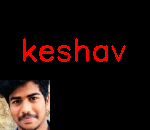

Class - keshav


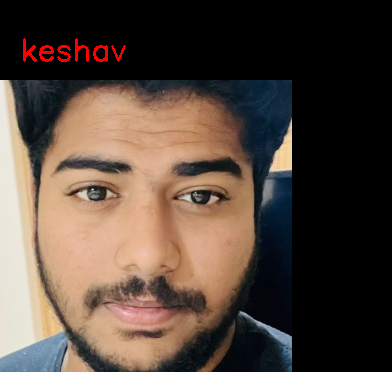

Class - keshav


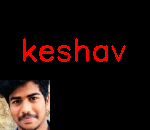

Class - sreeni


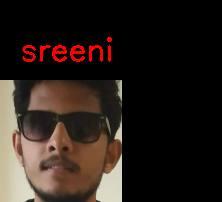

Class - sreeni


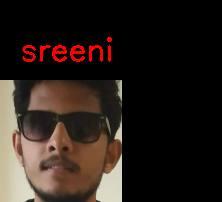

Class - sreeni


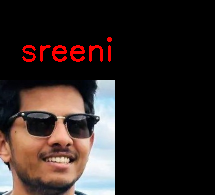

Class - akhila


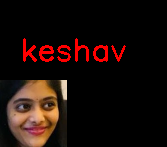

Class - komal


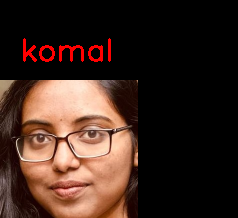

Class - akhila


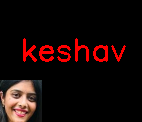

Class - sreeni


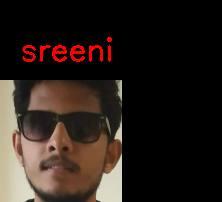

In [ ]:
from keras.models import load_model

classifier = load_model('/content/face_recognition.h5')

import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from os import listdir
from os.path import isfile, join

monkey_breeds_dict = {"[0]": "akhila",
                      "[1]": "keshav",
                      "[2]": "komal",
                      "[3]": "sreeni"}

monkey_breeds_dict_n = {"AKHILA": "akhila",
                      "KESHAV": "keshav",
                       "KOMAL": "komal",
                        "SREENI": "sreeni"
                        }

def draw_test(name, pred, im):
    monkey = monkey_breeds_dict[str(pred)]
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 80, 0, 0, 100 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, monkey, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2_imshow(expanded_image)

def getRandomImage(path):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    print("Class - " + monkey_breeds_dict_n[str(path_class)])
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    return cv2.imread(file_path+"/"+image_name)

for i in range(0,10):
    input_im = getRandomImage("/content/drive/MyDrive/FR_Data/valid/")
    input_original = input_im.copy()
    input_original = cv2.resize(input_original, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)

    input_im = cv2.resize(input_im, (224, 224), interpolation = cv2.INTER_LINEAR)
    input_im = input_im / 255.
    input_im = input_im.reshape(1,224,224,3)

    # Get Prediction
    res = np.argmax(classifier.predict(input_im, 1, verbose = 0), axis=1)

    # Show image with predicted class
    draw_test("Prediction", res, input_original)
    cv2.waitKey(0)

cv2.destroyAllWindows()